# Estimating errors between two trajectories

In [12]:
import numpy as np

import matplotlib.pyplot as plt
import validator as validator
from utils import *
from matplotlib.ticker import MaxNLocator

---
## Solution 2 - Pivots

In [2]:
dist, dist_to_line = distance, distance_to_line

def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    return min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) #p2 is the closest point

def find_next_focus_point2(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(p2, p1) < dist(q2, q1) #p2 is the closest point
    
def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)


def find_next_focus_point4(p1, p2, q1, q2, oldpoint):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    wrong_side = orientation(p1, q1, oldpoint)
    if orientation(p1, q1, p2) == wrong_side:
        return False
    elif orientation(p1, q1, q2) == wrong_side:
        return True
    else:
        return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)
    
def find_next_focus_point5(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(q1, p2) < dist(q2, p1) #p2 is the closest point

We are defining `si` and `tj` instead of simply using `S[i]` and `T[j]`, in order to be capable of redefining these points in the case of intersection.

### *Idea 1* - Simple switch between pivots

In [3]:
def error_btw_trajectories(S, T):
    assert len(S) >= 2 and len(T) >= 1, "IncorrectInputTrajectories"
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis("equal")
    plt.grid()
    error, old_point = 0, S[0]
    while i < len(S) - 1 and j < len(T) - 1:
        intersect = intersection_btw_segs(si, S[i+1], tj, T[j+1])
        if np.all(intersect != np.inf): # if the segments [S_i, S_i+1] and [T_i, T_i+1] intersect
            # Compute area of the triangle intersect, si, tj
            error += triangle_area(si, tj, intersect, ax)
            old_point = si # TODO : is this a good idea ??????????
            si, tj = intersect, intersect
            plt.plot(*intersect, 'og')
#             print("intersection")
        else:
            if find_next_focus_point4(si, S[i+1], tj, T[j+1], old_point):
                old_point = si
                si, i = S[i+1], i+1
            else:
                old_point = tj
                tj, j = T[j+1], j+1
            # Compute area of the triangle old_point, si, tj
            error += triangle_area(old_point, si, tj, ax)
#         print(i, j, error)
    
    if i == len(S) - 1:
        error += triangle_area(si, tj, T[j+1], ax)
        j += 1
        for j in range(j, len(T)-1):
            error += triangle_area(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        error += triangle_area(tj, si, S[i+1], ax)
        i += 1
        for i in range(i, len(S)-1):
            error += triangle_area(tj, S[i], S[i+1], ax)
    plt.show()
    Slen = sum(norm(S[i+1] - S[i]) for i in range(len(S) - 1))
    return error / Slen

test0.txt	

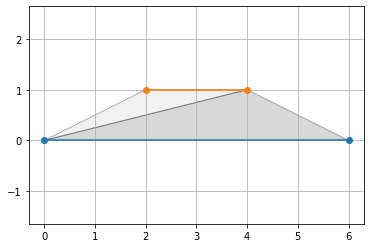

ok 	 The expected value is indeed 0.6666666666666666

test1.txt	

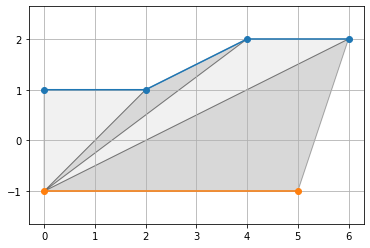

ok 	 The expected value is indeed 2.1648256639775307

test10.txt	

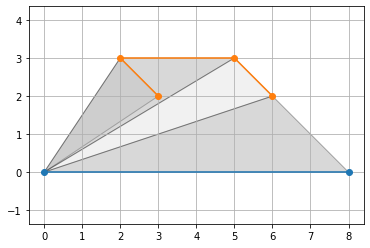

NOT ok 	 The expected value is 1.75, but the output value is 2.375.

test11.txt	

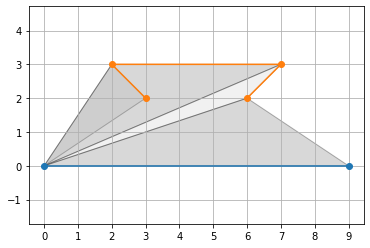

NOT ok 	 The expected value is 1.7777777777777777, but the output value is 2.3333333333333335.

test12.txt	

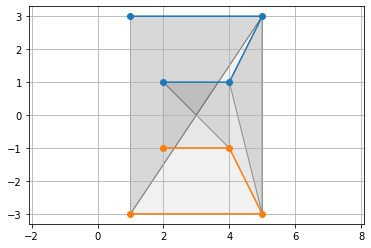

NOT ok 	 The expected value is 2.9140118883872597, but the output value is 3.885349184516346.

test13.txt	

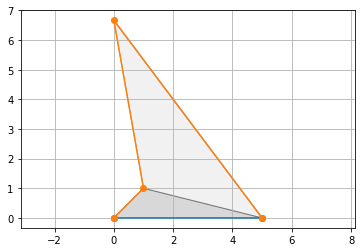

NOT ok 	 The expected value is 2.0, but the output value is 2.666666666668.

test2.txt	

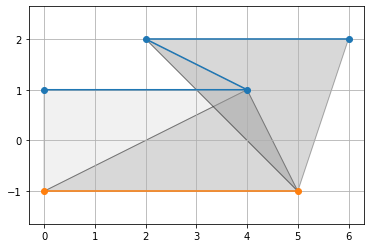

NOT ok 	 The expected value is 1.3188658017585226, but the output value is 1.6119470910381943.

test3.txt	

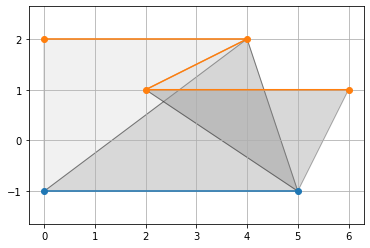

NOT ok 	 The expected value is 2.8, but the output value is 4.2.

test4.txt	

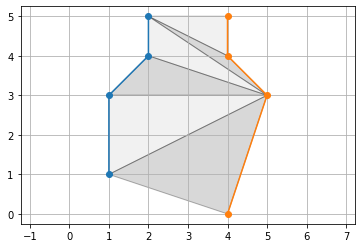

ok 	 The expected value is indeed 3.17157287525381

test5.txt	

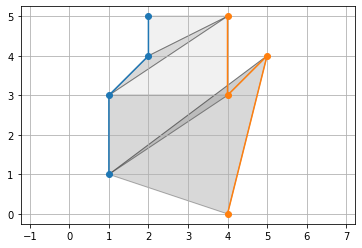

NOT ok 	 The expected value is 3.058302415423317, but the output value is 3.2848433350843034.

test6.txt	

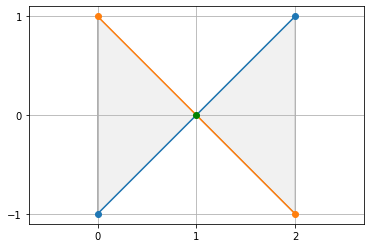

ok 	 The expected value is indeed 0.7071067811865475

test8.txt	

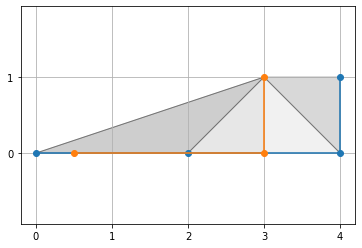

NOT ok 	 The expected value is 0.2, but the output value is 0.8.

test9.txt	

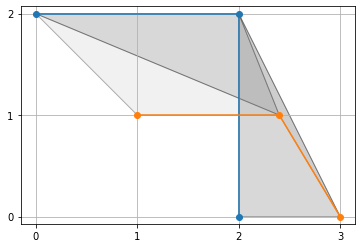

NOT ok 	 The expected value is 0.55, but the output value is 0.7.



False

In [4]:
validator.test(error_btw_trajectories, samples_range = slice(0, 13), dirname = "test/")
#../indoor-location-oracles/Oracles/

### Unittesting

In [5]:
import unittest
from os import listdir

In [6]:
def fetch_test_data(dirname, correct = True, criterion = '.txt', sep = ',', samples = slice(0, None)):
    """
    >>> fetch_test_data("../indoor-location-oracles/Oracles/CorrectInputTrajectories/")[0]
    ['10_parallelTrajectories.txt', array([[1., 1.],
           [3., 1.]]), array([[1., 2.],
           [3., 2.]]), 1.0, 0.001]
    >>> fetch_test_data("../indoor-location-oracles/Oracles/IncorrectInputTrajectories/", False)[2]
    [array([[0., 0.],
           [1., 0.]]), array([], dtype=float64)]
    >>> fetch_test_data("../indoor-location-oracles/Oracles/IncorrectInputTrajectories/", False)[1]
    [array([[0., 1.]]), array([], dtype=float64)]
    """
    test_file_names = [filename for filename in listdir(dirname) if criterion in filename]
    tests_sample = []
    for filename in sorted(test_file_names)[samples]:
        with open(dirname + filename, "r") as file:
            lines = file.read().splitlines() # getting rid of \n
            data = [[float(n) for n in line.split(sep) if n] for line in lines] # parse data
        
        reference = np.array(list(zip(data[0], data[1]))) # line 0 : x-axis of the reference trajectory, line 1 : y-axis
        acquired = np.array(list(zip(data[2], data[3])))  # line 2 : x-axis of the acquired trajectory, line 3 : y-axis
        if correct:
            expected_output, = data[4] or [-1]
            epsilon, = data[5] or [-1]
            tests_sample.append([filename, reference, acquired, expected_output, epsilon])
        else:
            tests_sample.append([reference, acquired])
    return tests_sample

if __name__ == "__main__":
    doctest.testmod()

In [7]:
class TestEstimator(unittest.TestCase):
    
    def test_incorrect_input(self):
        dirname = "../indoor-location-oracles/Oracles/IncorrectInputTrajectories/"
        for reference, acquired in fetch_test_data(dirname, correct = False):
            with self.assertRaises(AssertionError):
                error_btw_trajectories(reference, acquired)
    
    def test_correct_input(self):
        dirname = "../indoor-location-oracles/Oracles/CorrectInputTrajectories/"
        for filename, reference, acquired, expected_output, epsilon \
         in fetch_test_data(dirname, samples = slice(0,None)):
            output = error_btw_trajectories(reference, acquired)

            with self.subTest(test = filename, output = output, expected_output = expected_output):
                self.assertLessEqual(abs(expected_output - output), epsilon)

In [8]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestEstimator)
unittest.TextTestRunner().run(suite)

EE
ERROR: test_correct_input (unittest_validator.TestEstimator)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jean/Documents/M1/CSintro/err_btw_trajectories/unittest_validator.py", line 52, in test_correct_input
    output = error_btw_trajectories(reference, acquired)
NameError: name 'error_btw_trajectories' is not defined

ERROR: test_incorrect_input (unittest_validator.TestEstimator)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/jean/Documents/M1/CSintro/err_btw_trajectories/unittest_validator.py", line 46, in test_incorrect_input
    error_btw_trajectories(reference, acquired)
NameError: name 'error_btw_trajectories' is not defined

----------------------------------------------------------------------
Ran 2 tests in 0.005s

FAILED (errors=2)


<unittest.runner.TextTestResult run=2 errors=2 failures=0>

In [9]:
L = ['-0.5,1.5', '0,0', '-0.5,0,1,1.5', '0,2,-2,0', '2', '0.0000001']
T = [list(map(float, l.split(','))) for l in L]
a, = T[4]
print(a)

2.0


In [10]:
data = [[0.0, 1.0], [0.0, 0.0], [], [], [], []]
reference = np.array(list(zip(data[0], data[1]))) # line 0 : x-axis of the reference trajectory, line 1 : y-axis
epsilon, = data[5] or [data[5]]
print(epsilon)
# print(reference, *data[5] else 1)

[]


In [11]:
e = []
f = e, or 

SyntaxError: invalid syntax (<ipython-input-11-7cc5d2933b07>, line 2)

In [ ]:
a = 0.00001

In [ ]:
print(1/a)

In [ ]:
L = [[5, 4], [8, 9]]
for i, (a,b) in enumerate(L):
    print(i,a,b)